# Цели и задачи

**Цель:** изучить модель гармонических колебаний и программно реализовать процесс моделирования гармонического осциллятора.

**Задачи:**

- изучить теорию о модели гармонических колебаний
- построить модели гармонического осцилятора (фазовый портрет и его решение) для 3 случаев:
  * без затуханий, без воздейтвия внешних сил
  * с затуханиями, без воздействия внешних сил
  * с затуханиями, с воздействием внешних сил

# Теоретическая справка

Уравнение свободных колебаний гармонического осциллятора имеет следующий вид:

$$
\ddot{x} + 2\gamma\dot{x} + \omega_0^2 x = 0
$$

где $x$ – переменная, описывающая состояние системы (смещение грузика, заряд конденсатора и т.д.), $\gamma$ – параметр, характеризующий потери энергии (трение в механической системе, сопротивление в контуре), $\omega_0$ – собственная частота колебаний, $t$ – время. (Обозначения $\ddot{x} = \frac{\partial^2 x}{\partial t^2}, \dot{x} = \frac{\partial x}{\partial t}$)

Для решения поставленной нами задачи мы будем использовать именно эту форму уравнения, предварительно перейдя к следующей системе:

$$
\begin{cases}
\dot{x} = y
\\
\dot{y} = -\omega_0^2x - 2\gamma\dot{x} + f(t) 
\end{cases}
$$

где $f(t)$ - функция воздействия внешних сил.

# Программная реализация

## Подготовка к моделировнию

Все данные соответствуют варианту 14.

**Инициализация библиотек**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos
from scipy.integrate import odeint

**Начальные данные и необходимые функции**

Для успешной реализации модели нам потребуется $f(t)$ и начальные данные коэффициентов $\omega_0$ и $2\gamma$. Помимо этого, объявим функции для наших систем дифференциальных уравнений (с и без воздействия внешних сил).

In [2]:
w = np.sqrt(6)
g = 0.00

def f(t):
    value = cos(3.5*t)
    return value

def dx0(x,t):
    dx1 = x[1]
    dx2 = -w*w*x[0] - g*x[1]
    return [dx1, dx2]

def dx1(x,t):
    dx1 = x[1]
    dx2 = -w*w*x[0] - g*x[1] + f(t)
    return [dx1, dx2]

In [3]:
t0 = 0
x0 = [1,-0]
t = np.arange(t0, 45, 0.05)

Также объявим функции для построения решения и фазового портрета гармонического осциллятора. 

In [4]:
def plot_solution(res, title):
    plt.grid()
    plt.title(title)
    plt.plot(res)

def plot_portrait(res, title):
    y1 = res[:,0]
    y2 = res[:,1]
    
    plt.grid()
    plt.title(title)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(y1, y2)

## Гармонический осциллятор без затухания, без воздействия внешних сил

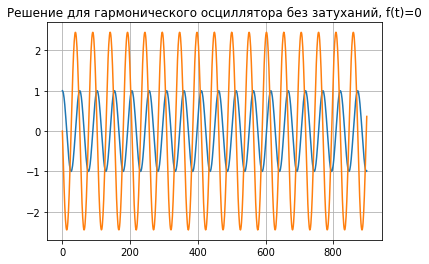

In [5]:
x = odeint(dx0, x0, t)
plot_solution(x, 'Решение для гармонического осциллятора без затуханий, f(t)=0')

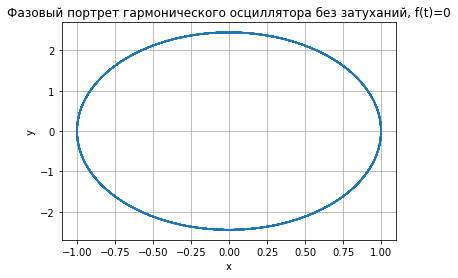

In [6]:
plot_portrait(x, 'Фазовый портрет гармонического осциллятора без затуханий, f(t)=0')

## Гармонический осциллятор с затуханиями, без воздействия внешних сил

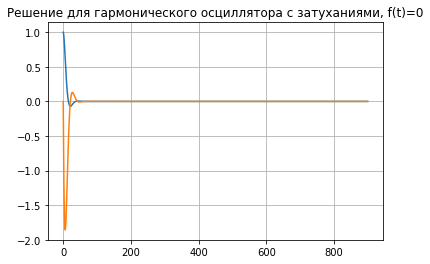

In [7]:
w = np.sqrt(15)
g = 5.00

x = odeint(dx0, x0, t)
plot_solution(x, 'Решение для гармонического осциллятора с затуханиями, f(t)=0')

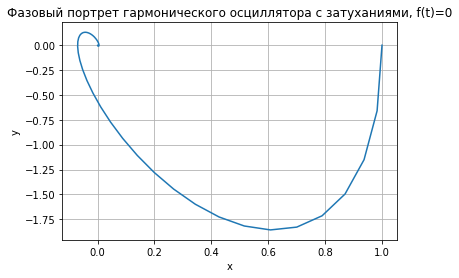

In [8]:
plot_portrait(x, 'Фазовый портрет гармонического осциллятора с затуханиями, f(t)=0')

## Гармонический осциллятор с затуханиями, с воздействием внешних сил

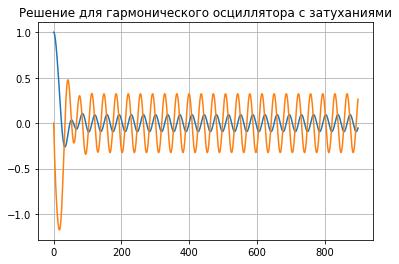

In [9]:
w = 2
g = 2.00

x = odeint(dx1, x0, t)
plot_solution(x, 'Решение для гармонического осциллятора с затуханиями')

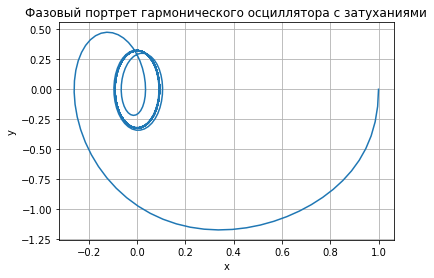

In [10]:
plot_portrait(x, 'Фазовый портрет гармонического осциллятора с затуханиями')

# Выводы

Мы изучили теорию о модели гармонических колебаний и программно реализовали процесс моделирования гармонического осциллятора, его фазового портрета и непосредственного решения. Все задачи можно считать выполненными успешно.